<a href="https://colab.research.google.com/github/MNoichl/SFI_homework_going_for_lunch/blob/main/analyze_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install compress-pickle --quiet
!pip install scikit-sparse nose
!pip install pygam
!pip install umap-learn
!pip install openTSNE
!pip install cmocean


In [ ]:
!pip install numba --upgrade --force-reinstall
!pip install numpy --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.25.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import numpy as np
import os
import pandas as pd

import networkx as nx
import seaborn as sns
import matplotlib as mpl
import tqdm
import scipy as sp
from compress_pickle import dump, load
import cmocean


In [ ]:

%%capture
import matplotlib.pyplot as plt

!pip install git+https://github.com/MNoichl/opinionated.git#egg=opinionated --force-reinstall
import opinionated
plt.style.use("opinionated_rc")

In [ ]:


def load_sim_results(directory):
    # Get all files in the directory
    files = os.listdir(directory)

    # Filter for .bz files
    bz_files = [file for file in files if file.endswith('.bz')]

    # Load each .bz file into a DataFrame
    dfs = [load(os.path.join(directory, file)) for file in bz_files]


    # Concatenate all DataFrames into a single DataFrame
    result = pd.concat(dfs, ignore_index=True)

    return result

base_dir = "drive/MyDrive/SFI_homework/random_geometric_with_random_leader_10000"

results = load_sim_results(base_dir)

In [ ]:
results.head()#.to_markdown()


RunId  iteration  Step      network_type  decision_success  \
0    402          0   100  random_geometric          0.251193   
1    402          0   100  random_geometric          0.251193   
2    402          0   100  random_geometric          0.251193   
3    402          0   100  random_geometric          0.251193   
4    402          0   100  random_geometric          0.251193   

   difference_to_leader  average_clustering  rgg_radius  \
0              0.338406            0.855238     0.91315   
1              0.338406            0.855238     0.91315   
2              0.338406            0.855238     0.91315   
3              0.338406            0.855238     0.91315   
4              0.338406            0.855238     0.91315   

   compute_weighted_preferences_with_random_leader  AgentID  \
0                                         0.217972        0   
1                                         0.217972        1   
2                                         0.217972        2   
3                                         0.217972        3   
4                                         0.217972        4   

   conscientiousness  i_want_to_lead  
0           0.938759        0.049020  
1           0.696378        0.009804  
2           0.092857        0.058824  
3           0.411244        0.107843  
4           0.412973        0.009804

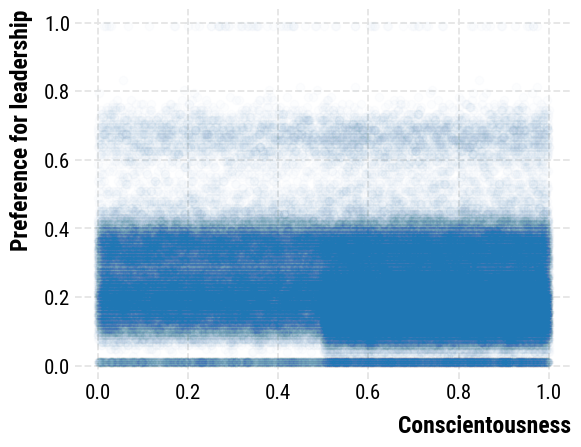

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the DataFrame by 'RunId'
grouped = results.groupby('RunId')

# Find the index of max i_want_to_lead value for each RunId
idx = grouped['i_want_to_lead'].idxmax()

# Use these indices to create the new DataFrame
max_leaders_df = results.loc[idx]

# Plotting
plt.scatter( max_leaders_df['conscientiousness'],max_leaders_df['i_want_to_lead'], alpha=0.01)
plt.ylabel('Preference for leadership')
plt.xlabel('Conscientousness')
plt.show()


<ipython-input-51-fee3d9e1fc52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(max_leaders_df['conscientiousness'])


Text(1, 0, 'Conscientousness')

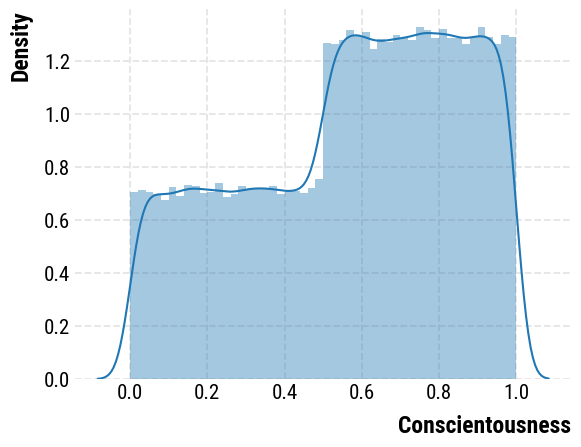

In [ ]:
sns.distplot(max_leaders_df['conscientiousness'])
plt.xlabel('Conscientousness')


<ipython-input-52-a6b8cff16306>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(max_leaders_df['average_clustering'])


<Axes: xlabel='average_clustering', ylabel='Density'>

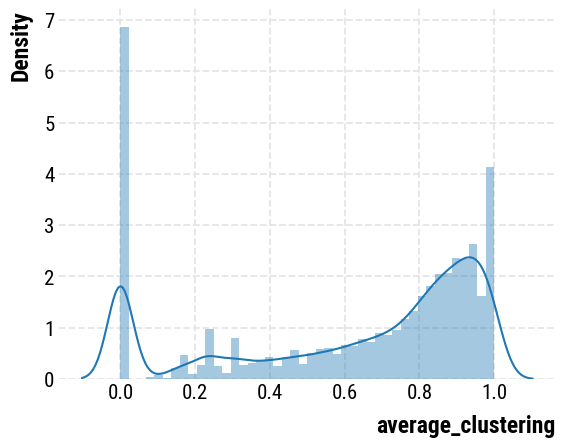

In [ ]:

sns.distplot(max_leaders_df['average_clustering'])

In [ ]:
sp.stats.pearsonr( max_leaders_df['conscientiousness'],max_leaders_df['i_want_to_lead'])

PearsonRResult(statistic=-0.106801843347443, pvalue=8.270436322801008e-100)

<Axes: ylabel='Probability'>

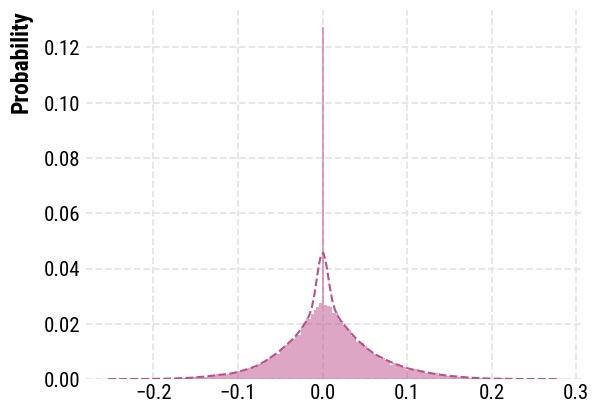

In [ ]:
sns.histplot(max_leaders_df['decision_success'] - max_leaders_df['compute_weighted_preferences_with_random_leader'], kde=True,
             color='#bd4f8a', alpha=.5, edgecolor=None,
             line_kws = {'linestyle': 'dashed'}, stat="probability", label='Random Leader')

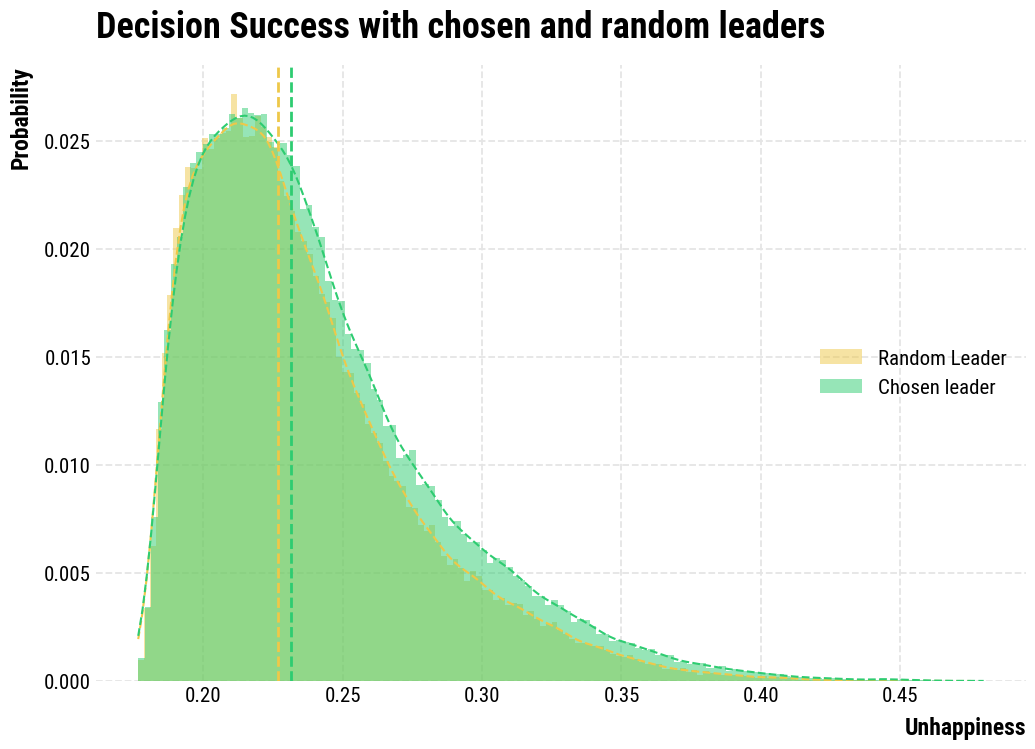

In [ ]:
# Prepare the figure
plt.figure(figsize=(12,8))

# Compute the first plot
plot0 = sns.histplot(max_leaders_df['compute_weighted_preferences_with_random_leader'], kde=True,
             color='#eec849', alpha=.5, edgecolor=None,
             line_kws = {'linestyle': 'dashed'}, stat="probability", label='Random Leader')

# Compute the second plot
plot1 = sns.histplot(max_leaders_df['decision_success'], kde=True,
             color='#2ecc71', alpha=.5, edgecolor=None,
             line_kws = {'linestyle': 'dashed'}, stat="probability", label='Chosen leader')

# plt.setp(plot1.get_lines(), color='black')
# Compute and plot median for the first dataset
median0 = max_leaders_df['compute_weighted_preferences_with_random_leader'].median()
plt.axvline(median0, color='#eec849', linestyle='dashed', linewidth=2)
# plt.text(median0+0.1, plt.ylim()[1]*0.9, 'Median (Random Leader): {:.2f}'.format(median0), color='#eec849')

# Compute and plot median for the second dataset
median1 = max_leaders_df['decision_success'].median()
plt.axvline(median1, color='#2ecc71', linestyle='dashed', linewidth=2)
# plt.text(median1+0.1, plt.ylim()[1]*0.8, 'Median (Chosen leader): {:.2f}'.format(median1), color='#2ecc71')

# plt.setp(plot1.get_lines(), color='black')
plt.title('Decision Success with chosen and random leaders')
plt.ylabel('Probability')
plt.xlabel('Unhappiness')

# Add the legend
plt.legend()

# # Save the plot
plt.savefig('drive/MyDrive/SFI_homework/median_diff_in_happiness.png', bbox_inches='tight',
            dpi=400, transparent=False)

plt.show()


In [ ]:
from scipy import stats

# Compute the t-test
t_stat, p_val = stats.ttest_ind(max_leaders_df['compute_weighted_preferences_with_random_leader'], max_leaders_df['decision_success'])

print(f'The t-statistic is {t_stat} and the p-value is {p_val}')


The t-statistic is -29.13165059691785 and the p-value is 3.524906463563674e-186


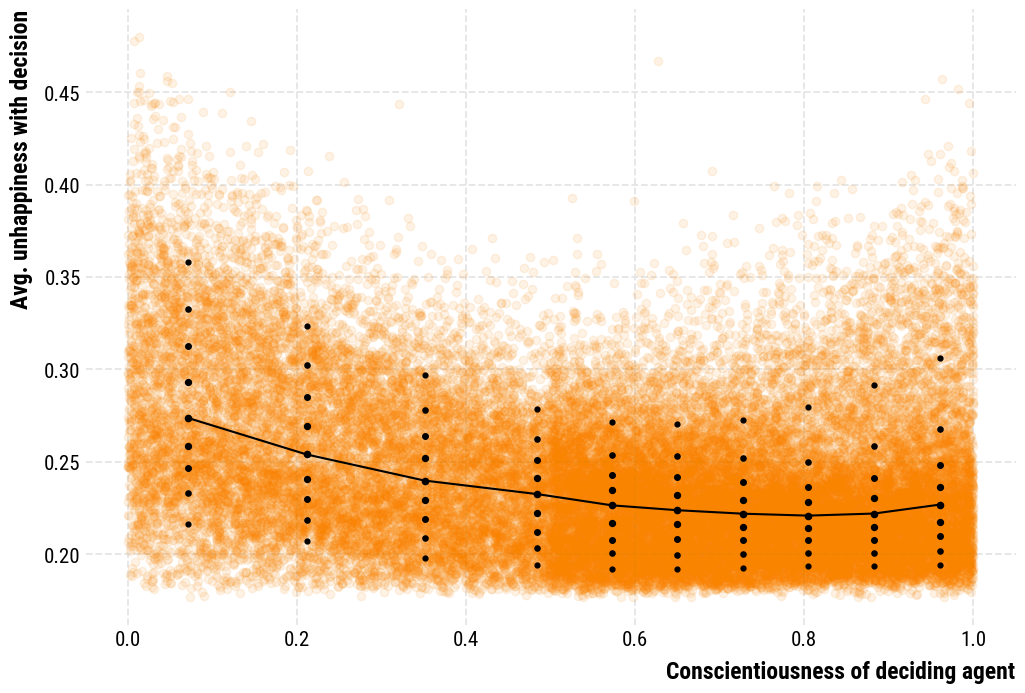

In [ ]:
# # Plotting
# plt.figure(figsize=(12,8))

# # Create deciles
# max_leaders_df['decile'] = pd.qcut(max_leaders_df['conscientiousness'], 10, labels=False)

# # Calculate median decision_success and mean conscientiousness within each decile
# medians = max_leaders_df.groupby('decile')['decision_success'].median()
# means = max_leaders_df.groupby('decile')['conscientiousness'].mean()

# # Plotting original scatter plot
# plt.scatter(max_leaders_df['conscientiousness'], max_leaders_df['decision_success'], color='#f98400',alpha=.1)

# # Plotting median decision_success for each decile over original scatter plot
# plt.scatter(means, medians, color='black')


# plt.ylabel('Avg. unhappiness with decision')
# plt.xlabel('Conscientiousness of deciding agent')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Create deciles
max_leaders_df['decile'] = pd.qcut(max_leaders_df['conscientiousness'], 10, labels=False)

# Calculate mean conscientiousness within each decile
means = max_leaders_df.groupby('decile')['conscientiousness'].mean()

# List of percentiles
percentiles = np.linspace(0.1, .9, 9)

# For each percentile, calculate the corresponding quantile of decision_success within each decile
quantiles = [max_leaders_df.groupby('decile')['decision_success'].quantile(p) for p in percentiles]

# Plotting original scatter plot
plt.scatter(max_leaders_df['conscientiousness'], max_leaders_df['decision_success'], color='#f98400', alpha=.1)

# Plotting decision_success quantiles for each decile over original scatter plot
for i, q in enumerate(quantiles):
    plt.scatter(means, q, color='black',s = (1- abs(.5 - percentiles[i]))*20)#, label=f'{int(percentiles[i]*100)}th percentile')
    if percentiles[i] ==.5:
      plt.plot(means, q,color='black')

plt.ylabel('Avg. unhappiness with decision')
plt.xlabel('Conscientiousness of deciding agent')
plt.legend()

plt.savefig(os.path.join(base_dir, 'conscientiousness_vs_unhappiness_percentile.png') ,bbox_inches='tight',
        dpi =400, transparent=False)
plt.show()



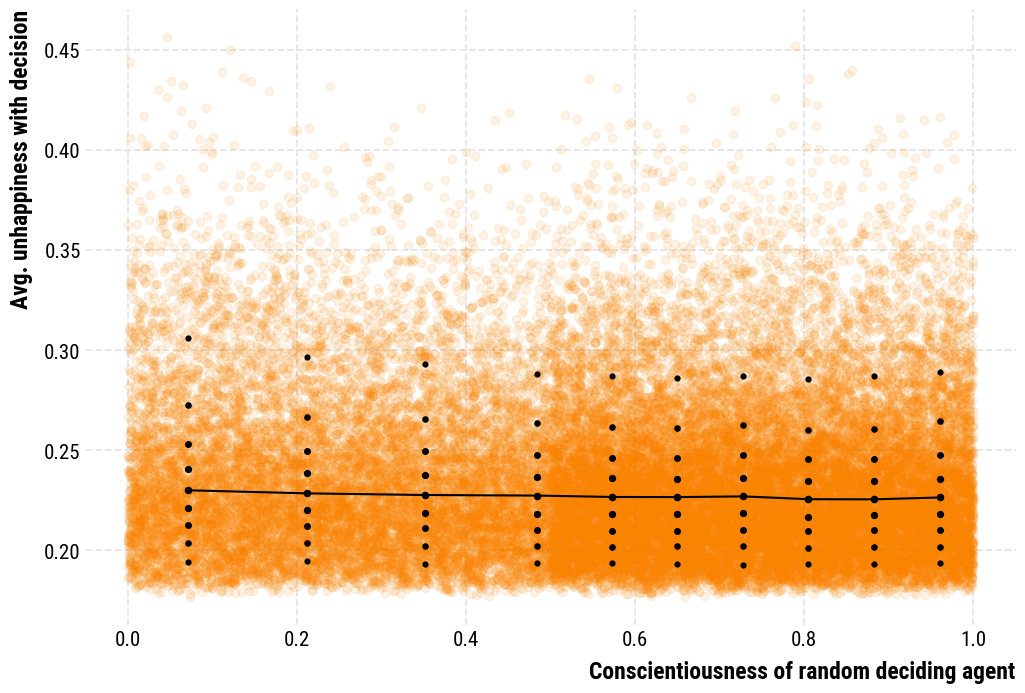

In [ ]:
# # Plotting
# plt.figure(figsize=(12,8))

# # Create deciles
# max_leaders_df['decile'] = pd.qcut(max_leaders_df['conscientiousness'], 10, labels=False)

# # Calculate median decision_success and mean conscientiousness within each decile
# medians = max_leaders_df.groupby('decile')['decision_success'].median()
# means = max_leaders_df.groupby('decile')['conscientiousness'].mean()

# # Plotting original scatter plot
# plt.scatter(max_leaders_df['conscientiousness'], max_leaders_df['decision_success'], color='#f98400',alpha=.1)

# # Plotting median decision_success for each decile over original scatter plot
# plt.scatter(means, medians, color='black')


# plt.ylabel('Avg. unhappiness with decision')
# plt.xlabel('Conscientiousness of deciding agent')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Create deciles
max_leaders_df['decile'] = pd.qcut(max_leaders_df['conscientiousness'], 10, labels=False)

# Calculate mean conscientiousness within each decile
means = max_leaders_df.groupby('decile')['conscientiousness'].mean()

# List of percentiles
percentiles = np.linspace(0.1, .9, 9)

# For each percentile, calculate the corresponding quantile of decision_success within each decile
quantiles = [max_leaders_df.groupby('decile')['compute_weighted_preferences_with_random_leader'].quantile(p) for p in percentiles]

# Plotting original scatter plot
plt.scatter(max_leaders_df['conscientiousness'], max_leaders_df['compute_weighted_preferences_with_random_leader'], color='#f98400', alpha=.1)

# Plotting decision_success quantiles for each decile over original scatter plot
for i, q in enumerate(quantiles):
    plt.scatter(means, q, color='black',s = (1- abs(.5 - percentiles[i]))*20)#, label=f'{int(percentiles[i]*100)}th percentile')
    if percentiles[i] ==.5:
      plt.plot(means, q,color='black')

plt.ylabel('Avg. unhappiness with decision')
plt.xlabel('Conscientiousness of random deciding agent')
plt.legend()

plt.savefig(os.path.join(base_dir, 'conscientiousness_vs_unhappiness_percentile_on_random_leader.png') ,bbox_inches='tight',
        dpi =400, transparent=False)
plt.show()



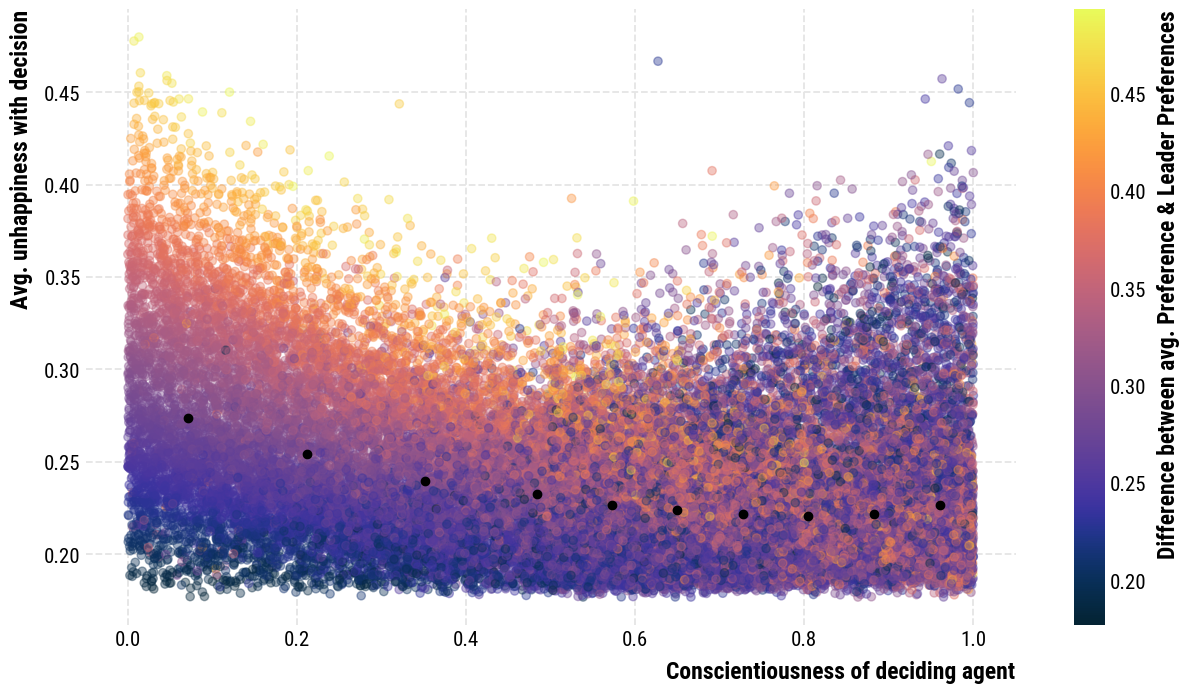

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(15,8))

# Create deciles
max_leaders_df['decile'] = pd.qcut(max_leaders_df['conscientiousness'], 10, labels=False)

# Calculate median decision_success and mean conscientiousness within each decile
medians = max_leaders_df.groupby('decile')['decision_success'].median()
means = max_leaders_df.groupby('decile')['conscientiousness'].mean()

# Plotting original scatter plot
scatter = plt.scatter(max_leaders_df['conscientiousness'], max_leaders_df['decision_success'],
                      c=max_leaders_df['difference_to_leader'],alpha=.4,cmap = cmocean.cm.thermal)
cbar = fig.colorbar(scatter, label='Difference between avg. Preference & Leader Preferences')
cbar.solids.set(alpha=1)  # Set colorbar opacity
# Plotting median decision_success for each decile over original scatter plot
plt.scatter(means, medians, color='black')


plt.ylabel('Avg. unhappiness with decision')
plt.xlabel('Conscientiousness of deciding agent')

plt.savefig(os.path.join(base_dir, 'conscientiousness_vs_unhappiness_colored_by_diff.png') ,bbox_inches='tight',
        dpi =400, transparent=False)
plt.show()


In [ ]:
#

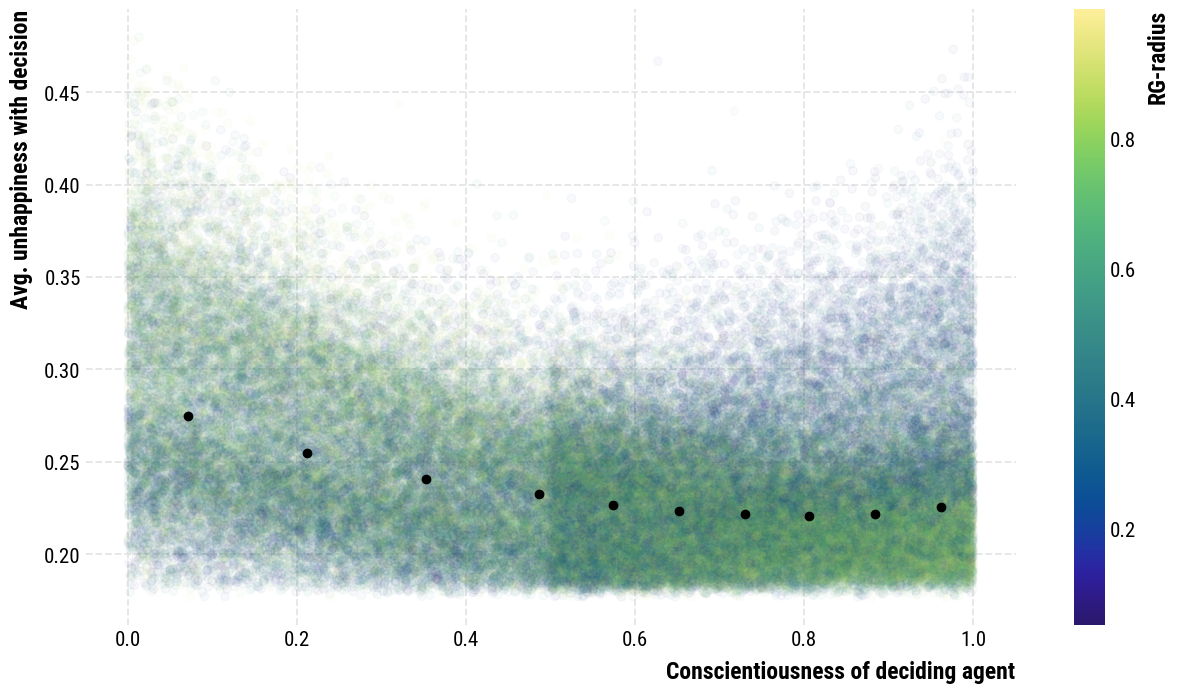

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(15,8))

# Create deciles
max_leaders_df['decile'] = pd.qcut(max_leaders_df['conscientiousness'], 10, labels=False)

# Calculate median decision_success and mean conscientiousness within each decile
medians = max_leaders_df.groupby('decile')['decision_success'].median()
means = max_leaders_df.groupby('decile')['conscientiousness'].mean()

# Plotting original scatter plot
scatter = plt.scatter(max_leaders_df['conscientiousness'], max_leaders_df['decision_success'],
                      c=max_leaders_df['rgg_radius'],alpha=.03,cmap = cmocean.cm.haline)
cbar = fig.colorbar(scatter, label='RG-radius')

cbar.solids.set(alpha=1)  # Set colorbar opacity
# Plotting median decision_success for each decile over original scatter plot
plt.scatter(means, medians, color='black')


plt.ylabel('Avg. unhappiness with decision')
plt.xlabel('Conscientiousness of deciding agent')

plt.savefig(os.path.join(base_dir, 'conscientiousness_vs_unhappiness_colored_by_radius.png') ,bbox_inches='tight',
        dpi =400, transparent=False)
plt.show()


In [ ]:
# what's interesting: Both high and low consc agents can have terrible outcomes...

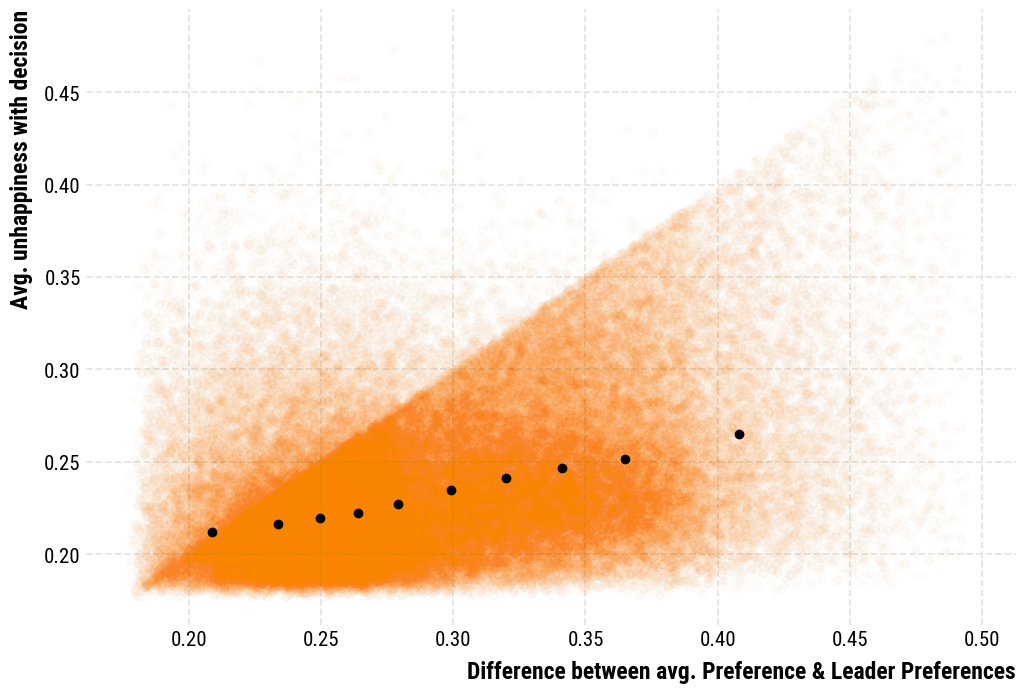

In [ ]:
# Plotting
plt.figure(figsize=(12,8))

# Create deciles
max_leaders_df['decile'] = pd.qcut(max_leaders_df['difference_to_leader'], 10, labels=False)

# Calculate median decision_success and mean conscientiousness within each decile
medians = max_leaders_df.groupby('decile')['decision_success'].median()
means = max_leaders_df.groupby('decile')['difference_to_leader'].mean()

# Plotting original scatter plot
plt.scatter(max_leaders_df['difference_to_leader'], max_leaders_df['decision_success'], color='#f98400',alpha=.02)

# Plotting median decision_success for each decile over original scatter plot
plt.scatter(means, medians, color='black')


plt.ylabel('Avg. unhappiness with decision')
plt.xlabel('Difference between avg. Preference & Leader Preferences')
plt.savefig(os.path.join(base_dir, 'diff_vs_unhappiness.png') ,bbox_inches='tight',
        dpi =400, transparent=False)
plt.show()


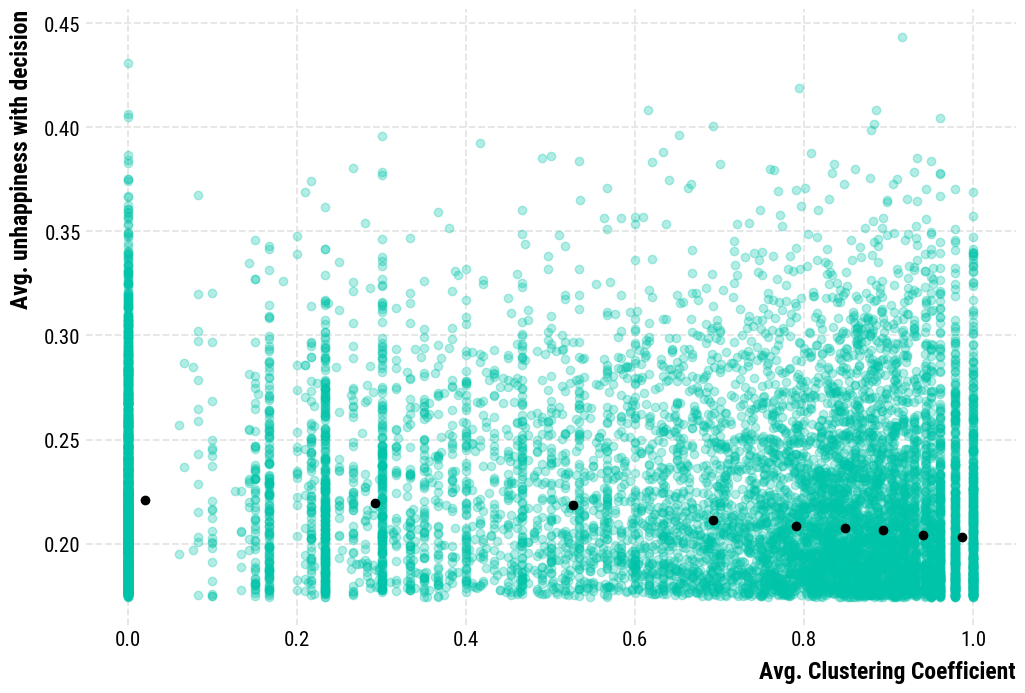

In [ ]:
# Use these indices to create the new DataFrame
max_leaders_df = results.loc[idx]
plt.figure(figsize=(12,8))


# Create deciles, drop duplicate bins
max_leaders_df['decile'] = pd.qcut(max_leaders_df['average_clustering'], 10, labels=False, duplicates='drop')

# Calculate median decision_success and mean conscientiousness within each decile
medians = max_leaders_df.groupby('decile')['decision_success'].median()
means = max_leaders_df.groupby('decile')['average_clustering'].mean()

# Plotting original scatter plot
plt.scatter(max_leaders_df['average_clustering'], max_leaders_df['decision_success'], color='#00c4a9',alpha=.3)

# Plotting median decision_success for each decile over original scatter plot
plt.scatter(means, medians, color='black')



plt.ylabel('Avg. unhappiness with decision')
plt.xlabel('Avg. Clustering Coefficient')
plt.savefig(os.path.join(base_dir, 'clust_coeff_vs_unhappiness.png') ,bbox_inches='tight',
        dpi =400, transparent=False)
plt.show()

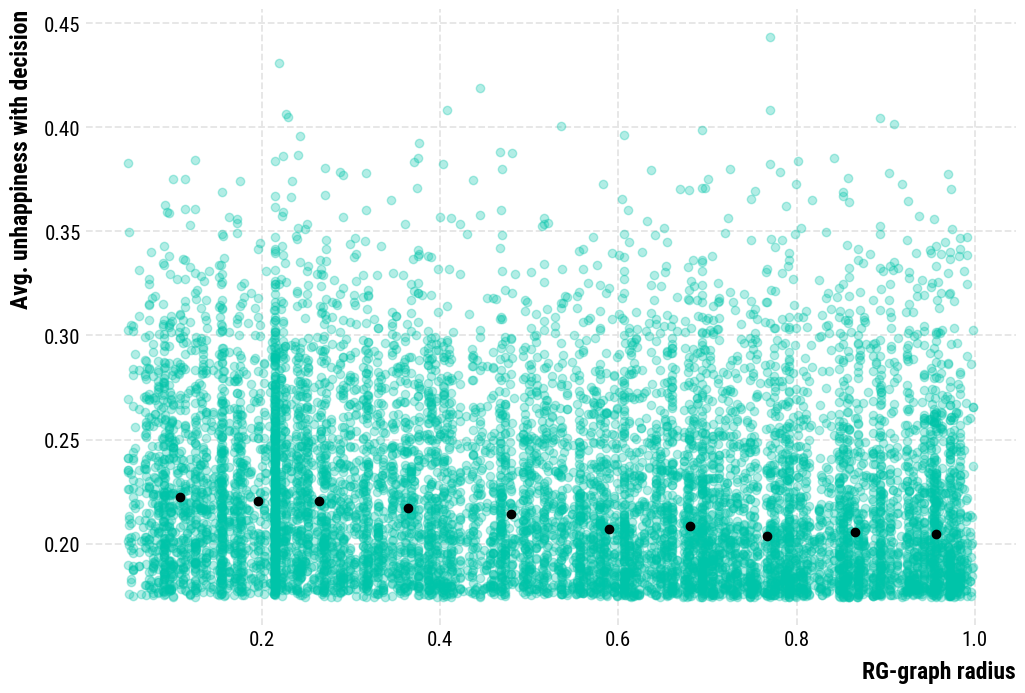

In [ ]:
# Use these indices to create the new DataFrame
max_leaders_df = results.loc[idx]
plt.figure(figsize=(12,8))


# Create deciles, drop duplicate bins
max_leaders_df['decile'] = pd.qcut(max_leaders_df['rgg_radius'], 10, labels=False, duplicates='drop')

# Calculate median decision_success and mean conscientiousness within each decile
medians = max_leaders_df.groupby('decile')['decision_success'].median()
means = max_leaders_df.groupby('decile')['rgg_radius'].mean()

# Plotting original scatter plot
plt.scatter(max_leaders_df['rgg_radius'], max_leaders_df['decision_success'], color='#00c4a9',alpha=.3)

# Plotting median decision_success for each decile over original scatter plot
plt.scatter(means, medians, color='black')



plt.ylabel('Avg. unhappiness with decision')
plt.xlabel('RG-graph radius')
plt.savefig(os.path.join(base_dir, 'radius_vs_unhappiness.png') ,bbox_inches='tight',
        dpi =400, transparent=False)
plt.show()